# A NOTE

Hi Colin,

I meant to finish this all today but I'm off on a grad school visit (UPenn) and they gave me wayyyyyy more free food and alcohol than I expected. Consequently some comments are lacking and I haven't done problem 4 e. as I thought I could finish them tonight but that very much became not an option.


Sorry about that....  
Ian

I think the pdf verision cuts some lines of code a bit short so I've also created html verisions which should hopefully be better.



I adhered to the honor code
I worked with Daniel Mukasa

-Ian Hunt-Isaak

In [267]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys #used to make a progress bar
# np.random.seed(0) # for consistency in shuffling

In [268]:
def euclid_dist(p1,p2):
    """
    returns the euclidean distance between p1 and p2
    p1 and p2 are nunpy arrays of the features
    """

    return np.sqrt(np.sum((p1-p2)**2))
def euclid_case_to_training(x, ts):
    """
    computes the euclidean distance between the particular case x and the training set ts
    assumes ts has rows with [class, feature 1, feature 2]
    Answer to problem 1. b.
    """

    return np.apply_along_axis(euclid_dist, 1, ts[:,[1,2]],p2=x)
def k_dist(x, ts, K):
    """
    returns the indices of the K nearest neighbors to x in the training set
    assumes ts has rows with [class, feature 1, feature 2]

    """

    return np.argsort(euclid_case_to_training(x,ts))[:K]
def majority_class(x, ts, K):
    """
    takes a training point, test set, and a value of K for K means. Returns the majority class of 
    the K points nearest to the x
    
    This implementation works best for binary classes. For problems with more classes it would be better
    to use scipy.stats.mode. I didn't use that here because that felt dirty.
    """

    return [np.where(np.mean(ts[:,0][k_dist(x,ts,K)]) >= 0.0, 1, -1)]



def predict(pred, ts, K):
    """
    returns a vector of predictions given a list of feature vectors and a training set
    """
    return np.apply_along_axis(majority_class, 1, pred, ts=ts,K=K)
def misclass_rate(labels, ground_truth):
    """
    returns the missclassification rate
    """
    return 1-np.sum(np.concatenate(labels)==ground_truth)/len(labels)
def cross_validation(ts, n=10,K=5):
    """
    returns the average missclassificaiton error across the n folds of data
    """
    np.random.shuffle(ts)
    n_folds = np.asarray(np.array_split(ts, n))
    index = np.arange(n)
    total = 0
    for i in range(n):
        total += misclass_rate(predict(n_folds[i][:,[1,2]],
                              np.concatenate(n_folds[index != i]),K),n_folds[i][:,0])
    return total/n
    


# 1. K Fold validation
doing it with S2 set and above functions

### S1

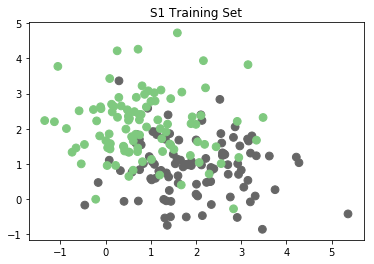

In [3]:
#load data
S1_train = np.genfromtxt('S1train.csv',skip_header=1,delimiter=',')
S1_test = np.genfromtxt('S1test.csv',skip_header=1,delimiter=',')

#plot training data
plt.scatter(x=S1_train[:,1], y=S1_train[:,2], c=S1_train[:,0],s=60,cmap='Accent')
plt.title('S1 Training Set')
plt.show()

[====================] 25/25 K values attempted  

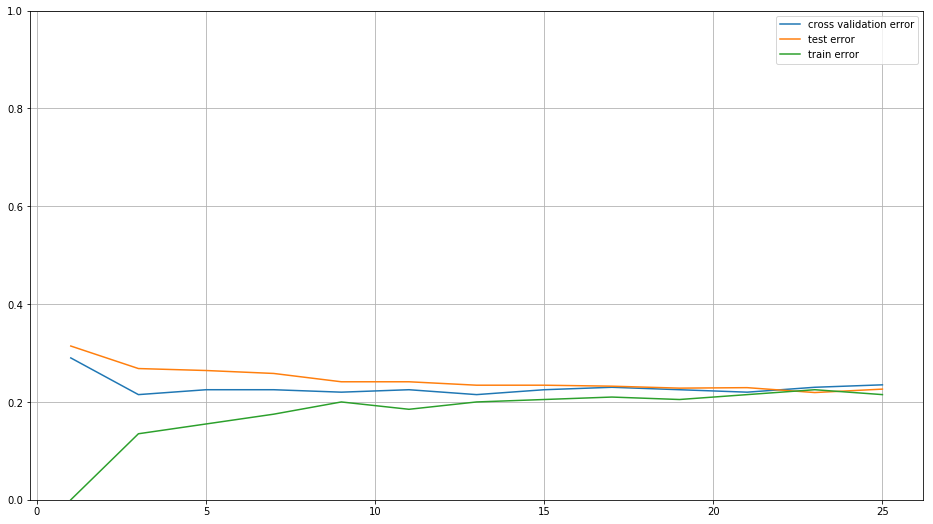

Wall time: 1min 2s


In [4]:
%%time
cv_error = []
tst_error = []
train_error = []
max_K = 25
ks = np.arange(1,max_K+2,step=2)

for k in ks:
    cv_error.append(cross_validation(ts = S1_train, n =10, K = k))
    tst_error.append(misclass_rate(predict(S1_test[:,1:],S1_train,K=k),S1_test[:,0]))
    train_error.append(misclass_rate(predict(S1_train[:,1:],S1_train,K=k),S1_train[:,0]))
    sys.stdout.write('\r')
    eq = int(np.ceil(np.true_divide(k*100,max_K*5)))
    sys.stdout.write("[{:20s}] {}/{} K values attempted  ".format('='*eq, k,max_K))
plt.figure(figsize=(16,9))
plt.plot(ks, cv_error,label='cross validation error')
plt.plot(ks, tst_error,label='test error')
plt.plot(ks, train_error,label='train error')
plt.legend()
plt.ylim([0,1])
plt.grid()
plt.show()

### S2

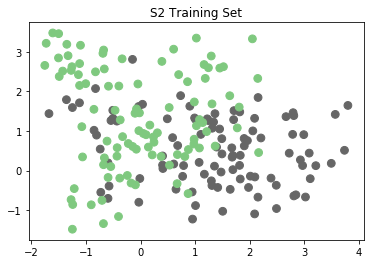

In [5]:
#load data
S2_train = np.genfromtxt('S2train.csv',skip_header=1,delimiter=',')
S2_test = np.genfromtxt('S2test.csv',skip_header=1,delimiter=',')

#plot training data
plt.scatter(x=S2_train[:,1], y=S2_train[:,2], c=S2_train[:,0],s=60,cmap='Accent')
plt.title('S2 Training Set')

[====================] 25/25 K values attempted  

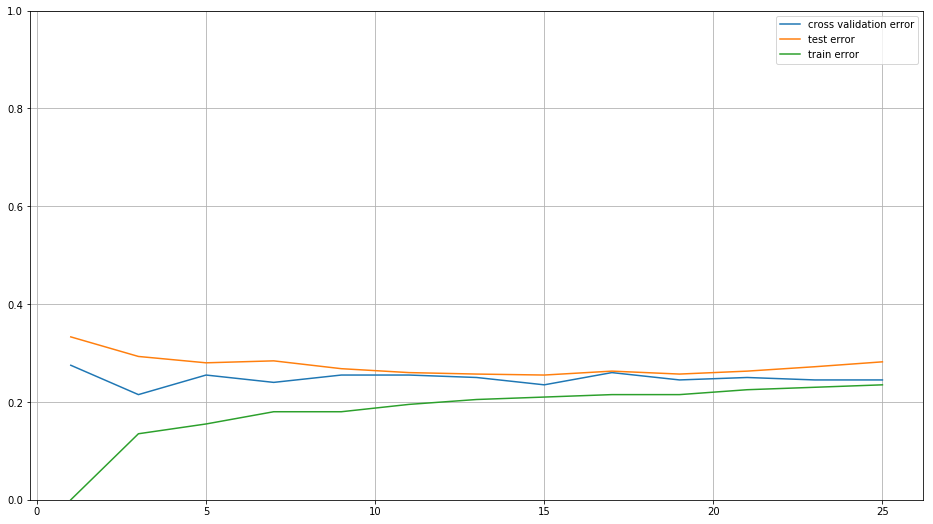

Wall time: 47.3 s


In [6]:
%%time
cv_error = []
tst_error = []
train_error = []
max_K = 25
ks = np.arange(1,max_K+2,step=2)

for k in ks:
    cv_error.append(cross_validation(ts = S2_train, n =10, K = k))
    tst_error.append(misclass_rate(predict(S2_test[:,[1,2]],S2_train,K=k),S2_test[:,0]))
    train_error.append(misclass_rate(predict(S2_train[:,[1,2]],S2_train,K=k),S2_train[:,0]))
    sys.stdout.write('\r')
    eq = int(np.ceil(np.true_divide(k*100,max_K*5)))
    sys.stdout.write("[{:20s}] {}/{} K values attempted  ".format('='*eq, k,max_K))
plt.figure(figsize=(16,9))
plt.plot(ks, cv_error,label='cross validation error')
plt.plot(ks, tst_error,label='test error')
plt.plot(ks, train_error,label='train error')
plt.legend()
plt.ylim([0,1])
plt.grid()
plt.show()

# Rewrite K Nearest with Lookup table
I rewrote my K - nearest neighbors

In [7]:
def majority_class_lookup(dist, ts, K):
    """
    takes a training point, test set, and a value of K for K means. Returns the majority class of 
    the K points nearest to the x.
    
    Unlike majority_class this one accepts a lookup table of distances
    
    This implementation works best for binary classes. For problems with more classes it would be better
    to use scipy.stats.mode. I didn't use that here because that felt dirty.
    """
    from scipy.stats import mode
    return mode(ts[:,0][dist[:K]])[0]
def predict_lookup(pred, ts, K):
    """
    returns a vector of predictions given a list of feature vectors and a training set
    """
    from scipy.spatial.distance import cdist
    dist = cdist(pred,ts[:,1:])
    k_dist = np.argsort(dist)

    a = np.apply_along_axis(majority_class_lookup, 1, k_dist, ts=ts,K=K)
    return a
def misclass_rate(labels, ground_truth):
    """
    returns the missclassification rate
    """
    return 1-np.sum(np.equal(np.concatenate(labels),ground_truth))/len(labels)
def cross_validation_lookup(ts, n=10,K=5):
    """
    returns the average missclassificaiton error across the n folds of data
    """
    np.random.shuffle(ts)
    n_folds = np.asarray(np.array_split(ts, n))
    index = np.arange(n)
    total = 0
    for i in range(n):          
        total += misclass_rate(predict_lookup(n_folds[i][:,1:],
                              np.concatenate(n_folds[index != i]),K),n_folds[i][:,0])
    return total/n

### Problem 1 now runs much quicker

[====================] 25/25 K values attempted  

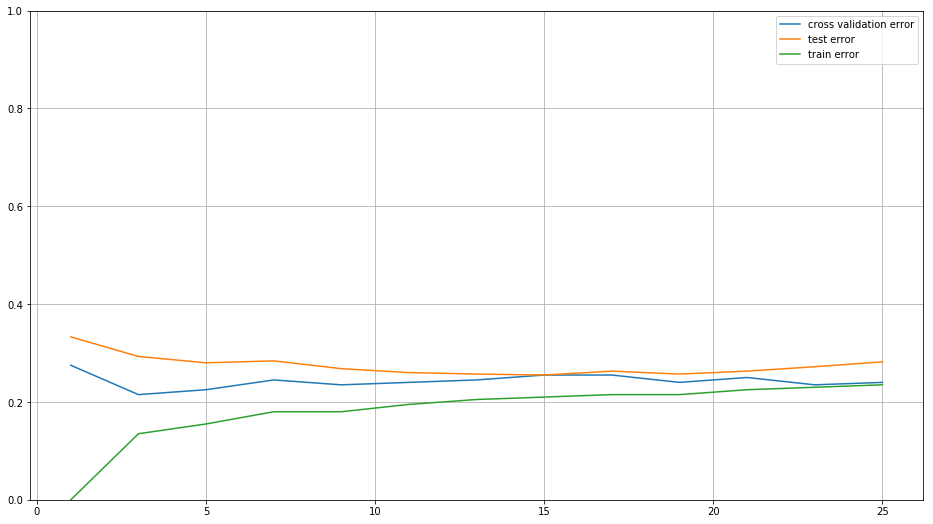

Wall time: 2.76 s


In [8]:
%%time


cv_error = []
tst_error = []
train_error = []
max_K = 25
ks = np.arange(1,max_K+2,step=2)

for k in ks:
    cv_error.append(cross_validation_lookup(ts = S2_train, n =10, K = k))
    tst_error.append(misclass_rate(predict_lookup(S2_test[:,[1,2]],S2_train,K=k),S2_test[:,0]))
    train_error.append(misclass_rate(predict_lookup(S2_train[:,[1,2]],S2_train,K=k),S2_train[:,0]))
    sys.stdout.write('\r')
    eq = int(np.ceil(np.true_divide(k*100,max_K*5)))
    sys.stdout.write("[{:20s}] {}/{} K values attempted  ".format('='*eq, k,max_K))
plt.figure(figsize=(16,9))
plt.plot(ks, cv_error,label='cross validation error')
plt.plot(ks, tst_error,label='test error')
plt.plot(ks, train_error,label='train error')
plt.legend()
plt.ylim([0,1])
plt.grid()
plt.show()

# Problem 2

need to prep the data first but then I can just apply the same algorithim.

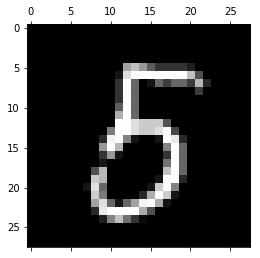

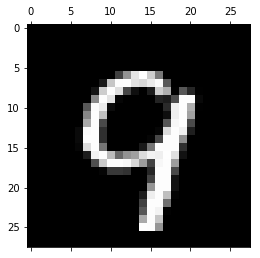

[[ 5.  0.  0. ...,  0.  0.  0.]
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 5.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 5.  0.  0. ...,  0.  0.  0.]]


In [9]:
d_5 = np.genfromtxt('Train5.csv',skip_header=1,delimiter=',')
d_9 = np.genfromtxt('Train9.csv',skip_header=1,delimiter=',')

# lets visualize!
plt.matshow(d_5[3].reshape(28,28),cmap='gray')
plt.show()
plt.matshow(d_9[3].reshape(28,28),cmap='gray')
plt.show()

# add on classification
d_5 = np.insert(d_5, 0, 5, axis=1)
print(d_5)
d_9 = np.insert(d_9, 0, 9, axis=1)

#combine into big training set
train_set = np.concatenate((d_5,d_9))
np.random.shuffle(train_set)


[====================] 25/25 K values attempted  

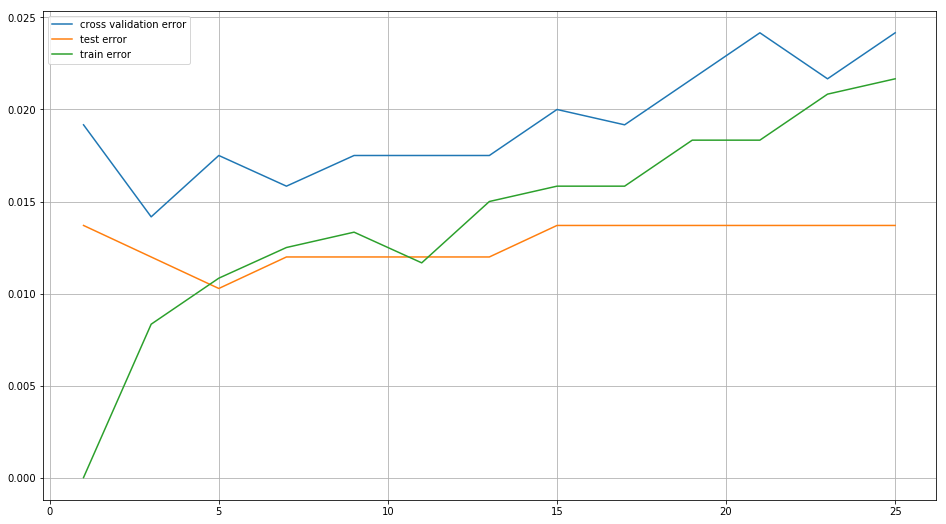

Wall time: 1min 2s


In [97]:
%%time
tst_5 = np.genfromtxt('Test5.csv',skip_header=1,delimiter=',')
tst_9 = np.genfromtxt('Test9.csv',skip_header=1,delimiter=',')
tst_5 = np.insert(tst_5, 0, 5, axis=1)
tst_9 = np.insert(tst_9, 0, 9, axis=1)
test_set = np.concatenate((tst_5,tst_9))

cv_error = []
tst_error = []
train_error = []
max_K = 25
ks = np.arange(1,max_K+2,step=2)

for k in ks:
    cv_error.append(cross_validation_lookup(ts = train_set, n =10, K = k))
    tst_error.append(misclass_rate(predict_lookup(test_set[:,1:],train_set,K=k),test_set[:,0]))
    train_error.append(misclass_rate(predict_lookup(train_set[:,1:],train_set,K=k),train_set[:,0]))
    sys.stdout.write('\r')
    eq = int(np.ceil(np.true_divide(k*100,max_K*5)))
    sys.stdout.write("[{:20s}] {}/{} K values attempted  ".format('='*eq, k,max_K))
plt.figure(figsize=(16,9))
plt.plot(ks, cv_error,label='cross validation error')
plt.plot(ks, tst_error,label='test error')
plt.plot(ks, train_error,label='train error')
plt.legend()
plt.grid()
plt.show()

This time could easily be improved upon by calculating the distances between the folds of the cross validation set once before the slicing. However this would have required modifying my predictor function in a way that I feel would make it less robust as when you do the testing you don't do the folds. So point is I didn't bother...

# Problem 3

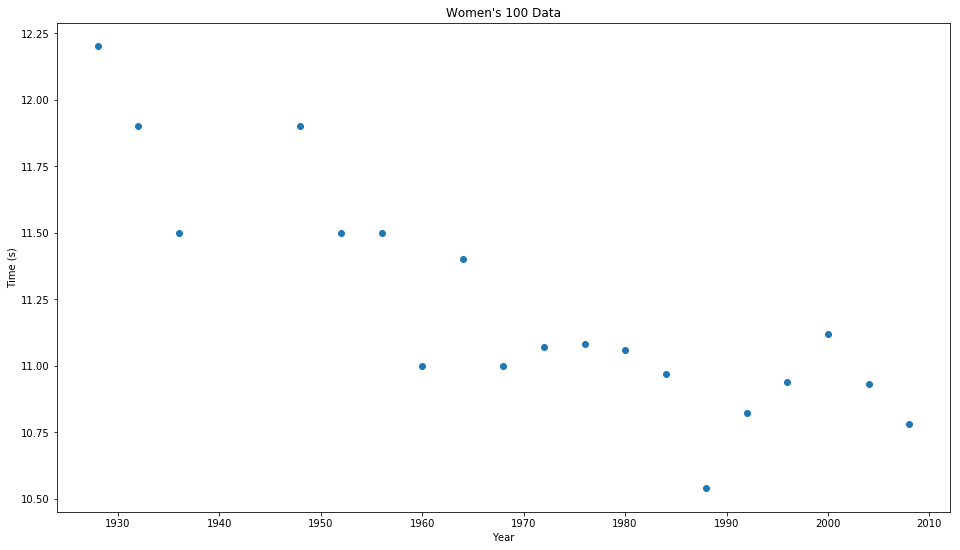

In [11]:
#load and visualize data
d = np.loadtxt('womens100.csv',delimiter=',')
plt.figure(figsize=(16,9))
plt.title("Women's 100 Data") 
plt.scatter(d[:,0],d[:,1])
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.show()


In [12]:
def OLS(x, t):
    """
    Ordinry least squares regression algorithim
    Accepts: two numpy arrays of shape (N,)
    Returns (w0, w1) that correspond to a linear model of tn = w0 + w1 * xn as a best fit line
    """
    w1 =np.dot(x-np.mean(x),t-np.mean(t))/np.sum((x-np.mean(x))**2)
    w0 = np.mean(t)-w1*np.mean(x)
    return (w0,w1)
(w0, w1) = OLS(d[:,0],d[:,1])
print("w0 = {:}".format(w0))
print("w1 = {:}".format(w1))

w0 = 40.92415460065391
w1 = -0.015071812237272308


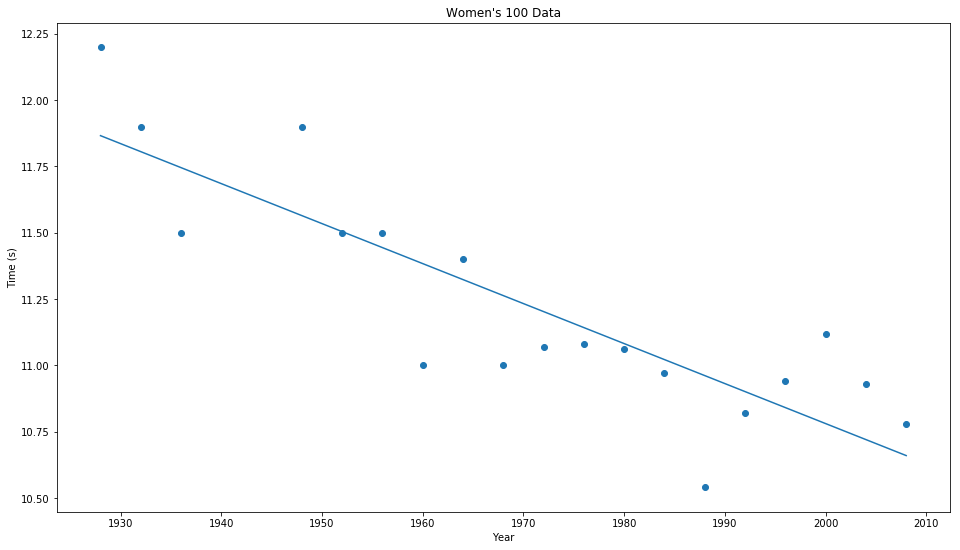

In [13]:
x = np.linspace(d[:,0][0],d[:,0][-1],100)
y = w0 + w1*x
plt.figure(figsize=(16,9))
plt.title("Women's 100 Data")
plt.plot(x,y)
plt.scatter(d[:,0],d[:,1])
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.show()


### Comparing to lmfit
lmfit is my prefered python least squares regression solver as it prints out fit information quite nicely.
It is based on algorithims in scipy and so should return good values

https://lmfit.github.io/lmfit-py/index.html

In [14]:
from lmfit.models import LinearModel


mod = LinearModel()

pars = mod.guess(d[:,1], x=d[:,0])
res  = mod.fit(y, pars, x=x)
print(res.fit_report())


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 6
    # data points      = 100
    # variables        = 2
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -inf
    Bayesian info crit = -inf
[[Variables]]
    slope:      -0.01507181 +/- 0        (0.00%) (init=-0.01507181)
    intercept:   40.9241546 +/- 0        (0.00%) (init= 40.92415)
[[Correlations]] (unreported correlations are <  0.100)



### Comparing Fit parameters

I originally checked with np.isclose which allows for a small tolerance however my solution and the off the shelf
solution are close enough such that np.equal works.

In [15]:
lmfit_fit = [res.best_values['intercept'], res.best_values['slope']]
print(np.equal([w0,w1],lmfit_fit))

[ True  True]


### Predicting 2012 and 2016

In [16]:
# 2012

print("2012: "+ str(w0+2012*w1))

#2016
print("2016: "+ str(w0+2016*w1))

#Actual results

print("Actual Results:")
print("2012:  10.75")
print("2016: 10.71")




2012: 10.5996683793
2016: 10.5393811303
Actual Results:
2012:  10.75
2016: 10.71


#### Comparison

I don't think a linear model captures the underlying phenomenon best here as humans cannot improve speed at a constant rate. So it is reasonable that our model underestimates the time it should take.

#### multiple input variables

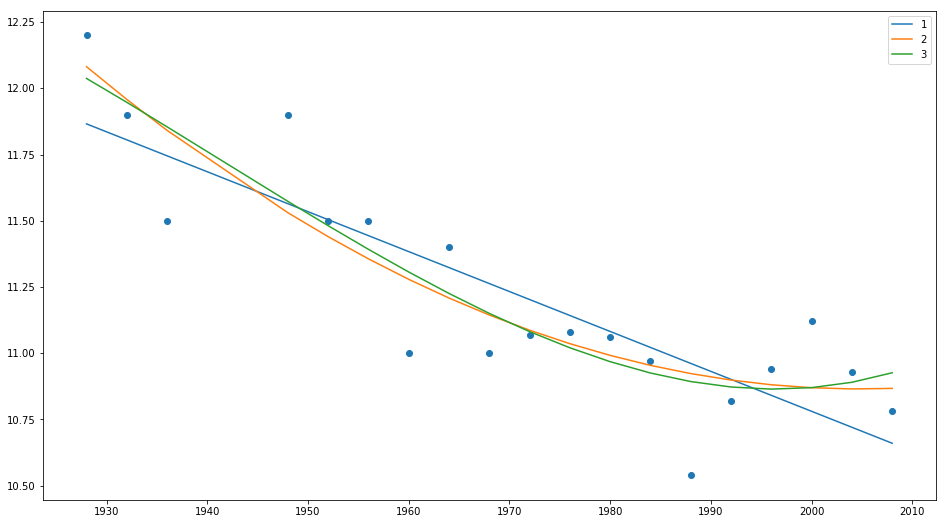

In [17]:
def OLS(x,t, extend=False, d = 3):
    """
    Ordinry least squares regression algorithim
    Accepts: two numpy arrays of shape (N,)
    Returns (x, (w0, w1)) that correspond to a linear model of tn = w0 + w1 * xn as a best fit line
    and x is the possibly extended feature vector.
    
    Automatically adds the 1's in the feature vector for the intercept term
    """
    
    if not extend:
        d=0

    x_new = np.zeros((x.shape[0],d+1))
#         x_new[:,0] = 1
    for i in range(d+1):
        x_new[:,i] = x**i
    x = x_new

    a = np.dot(np.linalg.inv(np.dot(x.T,x)),x.T)
    
    #also do a quick sorting to make plotting nice
    idx   = np.argsort(x[:,1])
    x = np.array(x)[idx]
    
    return (x,np.dot(a,t.T))

x= d[:,0]

x,w = OLS(x,np.column_stack(d[:,1]),extend=True,d=2)

y = np.dot(x,w)
plt.figure(figsize=(16,9))
for dim in range(1,4):
    x,w = OLS(d[:,0],np.column_stack(d[:,1]),extend=True,d=dim)
    y = np.dot(x,w)
    plt.plot(x[:,1],y,label=dim)
plt.scatter(d[:,0],d[:,1])
plt.legend()
plt.show()

In [18]:

x= d[:,0]
print(np.column_stack(np.column_stack(np.column_stack(x))).shape)

print(np.column_stack(np.column_stack(x)).shape)
print(np.column_stack(x).shape)

(1, 19)
(19, 1)
(1, 19)


Ok lets try fitting with the polynomial: $$w_0 + w_1 x + w_1 x^2 + w_1 x^3$$

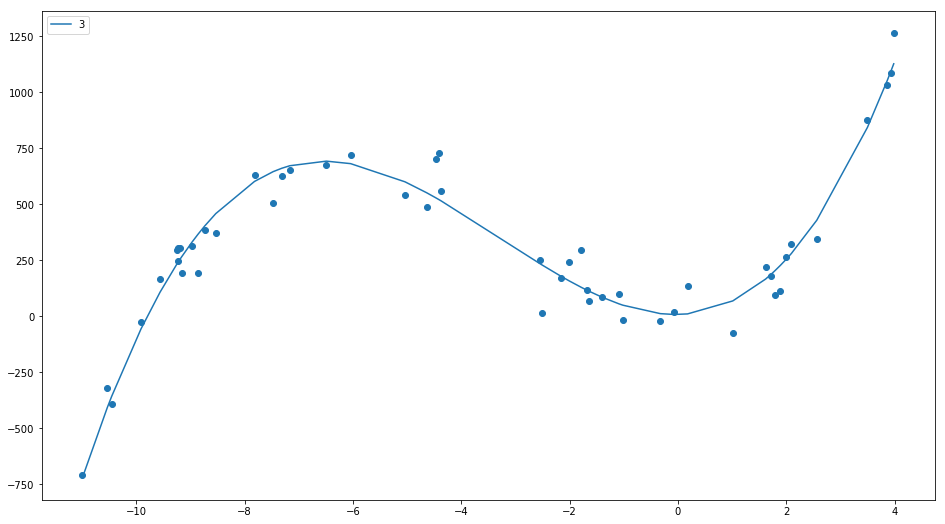

In [20]:
d = np.genfromtxt('synthdata2016.csv',delimiter=',')
x,w = OLS(d[:,0],np.column_stack(d[:,1]),extend=True,d=3)
y = np.dot(x,w)

plt.figure(figsize=(16,9))
plt.scatter(d[:,0],d[:,1])
plt.plot(x[:,1],y,label=3)
plt.legend()
plt.show()

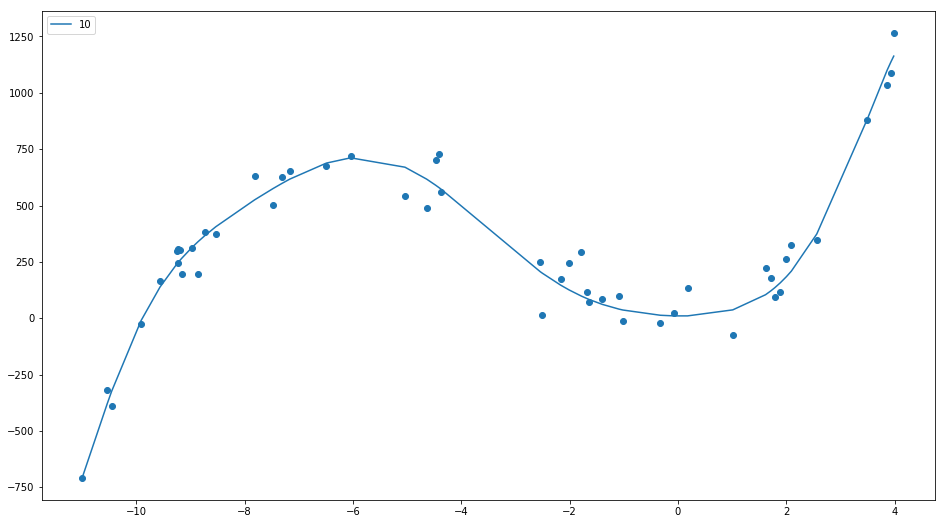

In [274]:
### adding regularization

def OLS(x,t, lamb = 1, d = 1):
    """
    Ordinry least squares regression algorithim
    Accepts: two numpy arrays of shape (N,)
    Returns (x, (w0, w1)) that correspond to a linear model of tn = w0 + w1 * xn as a best fit line
    and x is the possibly extended feature vector.
    
    Automatically adds the 1's in the feature vector for the intercept term
    """

    x_new = np.zeros((x.shape[0],d+1))

    for i in range(d+1):
        x_new[:,i] = x**i
    x = x_new
    #I've added the lambda*identity to  X.T * X + lambda+identity
    a = np.dot(np.linalg.inv(np.dot(x.T,x)+np.identity(x.shape[1])*lamb),x.T)
    
    #also do a quick sorting to make plotting nice
    idx   = np.argsort(x[:,1])
    x = np.array(x)[idx]
    
    return (x,np.dot(a,t.T))
d = np.genfromtxt('synthdata2016.csv',delimiter=',')
x,w = OLS(d[:,0],np.column_stack(d[:,1]),d=10,lamb=50)
y = np.dot(x,w)

plt.figure(figsize=(16,9))
plt.scatter(d[:,0],d[:,1])
plt.plot(x[:,1],y,label=10)
plt.legend()
plt.show()

### Wow even with dimenisionality up to 10 still fits fairly reasonably

# Problem 4

In [282]:
def polynomial_extend(x,d=3):
    x_new = np.zeros((x.shape[0],d+1))

    for i in range(d+1):
        x_new[:,i] = x**i
    return x_new
def OLS(x,t, lamb = 1,d = 1):
    """
    Ordinry least squares regression algorithim
    Accepts: two numpy arrays of shape (N,)
    Returns (x, (w0, w1)) that correspond to a linear model of tn = w0 + w1 * xn as a best fit line
    and x is the possibly extended feature vector.
    
    Automatically adds the 1's in the feature vector for the intercept term
    """
    
    x = polynomial_extend(x, d)
    
    #I've added the lambda*identity to  X.T * X + lambda+identity
    a = np.dot(np.linalg.inv(np.dot(x.T,x)+np.identity(x.shape[1])*lamb),x.T)
    
    #also do a quick sorting to make plotting nice
    if x.shape[1]>1:
        idx = np.argsort(x[:,1])
        x = np.array(x)[idx]
    
    return (x,np.dot(a,t.T))

def mean_squared_error(pred, actual):
    """
    returns the mean squared error
    """
    if pred.shape != actual.shape:
        raise ValueError(
            "prediction has shape {:} while actual has shape {:}they need to have the same shape".format(
                pred.shape, actual.shape))
    return np.sum((pred-actual)**2)/pred.shape[0]
# mean_squared_error(np.array([0,1,2]),np.array([[0,1,2]]))
def K_fold_OLS(x,t,lamb=1,extend=False,d=3,K=10):
    #Shuffle and create K folds
    perm = np.random.permutation(t.shape[0])
    x = x[perm]
    t = t[perm]
    
    x_folds = np.asarray(np.array_split(x, K))
    t_folds = np.asarray(np.array_split(t, K))

    total_mean_squared = 0
    index = np.arange(K)
    val_means = []
    train_means = []
    for i in index:
        train_t = np.concatenate(t_folds[index != i])
        train_x = np.concatenate(x_folds[index != i])
        w = OLS(train_x, train_t, lamb = lamb, d=d)[1]
        x = polynomial_extend(x_folds[i], d)
        prediction = np.dot(x,w)
        
        val_means.append(mean_squared_error(prediction, t_folds[i]))
        prediction = np.dot(polynomial_extend(train_x,d),w)
        train_means.append(mean_squared_error(prediction, train_t))
        
    val_std_dev = np.std(val_means)
    train_std_dev = np.std(train_means)
    return np.sum(train_means)/K, train_std_dev, np.sum(val_means)/K, val_std_dev

def k_fold_OLS_dimensions(x,t,D=5,lamb=1,K=9):
    """
    does K fold cross validation for polynomial regression with d = 0 to 10
    """
    val_sqr_err = np.zeros(D)
    val_std_dev = np.zeros(D)
    train_sqr_err = np.zeros(D)
    train_std_dev = np.zeros(D)

    for d in range(0,D):
        train_sqr_err[d], train_std_dev[d], val_sqr_err[d], val_std_dev[d] = K_fold_OLS(x,t,lamb,d=d,K=K)
    train_err_std = np.zeros((D,2))
    train_err_std[:,0] = train_sqr_err
    train_err_std[:,1] = train_std_dev
    
    val_err_std = np.zeros((D,2))
    val_err_std[:,0] = val_sqr_err
    val_err_std[:,1] = val_std_dev
    
    return train_err_std, val_err_std
      

## 4. c.
I'm going to use $\lambda$ = 500 for synthdata and $\lambda = 5$ for the women's 100 so that $\lambda$ is on the order of the data.

In [283]:
d_womens_100 = np.loadtxt('womens100.csv',delimiter=',')
d_synth      = np.genfromtxt('synthdata2016.csv',delimiter=',')

#### Women's 100  K=10

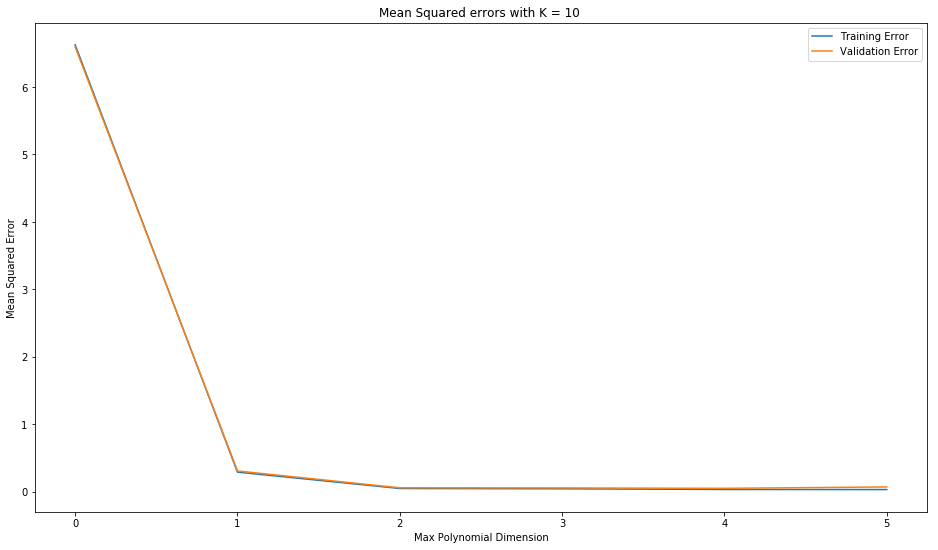

I find the optimal d to be: 4
Here is a plot of that fit:


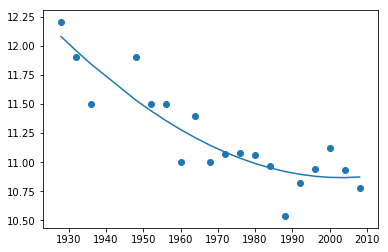

In [284]:

max_dim = 5
train = np.zeros((D,2))
val = np.zeros((D,2))
train, val = k_fold_OLS_dimensions(d_womens_100[:,0],d_womens_100[:,1],D=max_dim+1,K=10,lamb=5)
plt.figure(figsize=(16,9))
ds = np.arange(0,max_dim+1)
plt.plot(ds,train[:,0],label='Training Error')
plt.plot(ds,val[:,0],label='Validation Error')
plt.xlabel('Max Polynomial Dimension')
plt.ylabel('Mean Squared Error')
plt.title("Mean Squared errors with K = 10 ")
plt.legend()
plt.show()

optimal_d = np.argsort(val[:,0])[0]
print("I find the optimal d to be: {:}".format(optimal_d))
print("Here is a plot of that fit:")
x, w = OLS(d_womens_100[:,0],d_womens_100[:,1],lamb=5,d=optimal_d)
pred = np.dot(x,w)

plt.plot(x[:,1], pred)
plt.scatter(d_womens_100[:,0],d_womens_100[:,1])
plt.show()



This plot shows that both training and validation error decrease by significant stpes up until d = 2 after which there is small improved until d = 4, by d =5 we are overfitting enough such that our validation error begins to rise again.

#### Women's 100  K=N

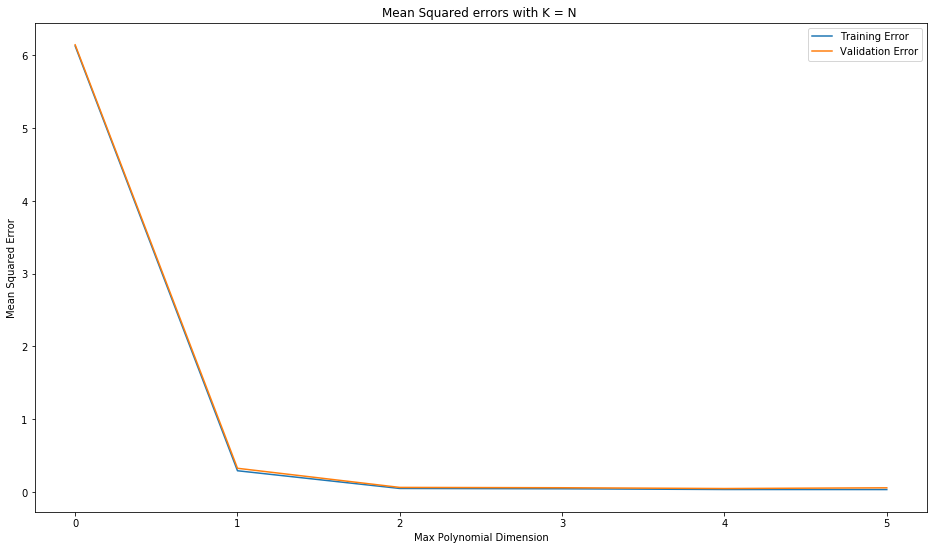

I find the optimal d to be: 4
Here is a plot of that fit:


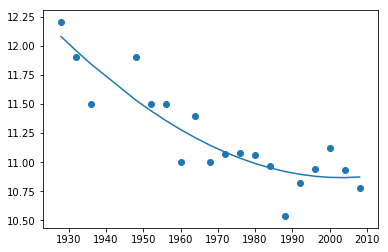

In [238]:

max_dim = 5
train = np.zeros((D,2))
val = np.zeros((D,2))
train, val = k_fold_OLS_dimensions(d_womens_100[:,0],d_womens_100[:,1],D=max_dim+1,K=len(d_womens_100[:,0]),lamb=5)
plt.figure(figsize=(16,9))
ds = np.arange(0,max_dim+1)
plt.plot(ds,train[:,0],label='Training Error')
plt.plot(ds,val[:,0],label='Validation Error')
plt.xlabel('Max Polynomial Dimension')
plt.ylabel('Mean Squared Error')
plt.title("Mean Squared errors with K = N ")
# plt.xlim([.95,5])
# plt.ylim([0,.4])
plt.legend()
plt.show()
optimal_d = np.argsort(val[:,0])[0]
print("I find the optimal d to be: {:}".format(optimal_d))
print("Here is a plot of that fit:")
x, w = OLS(d_womens_100[:,0],d_womens_100[:,1],lamb=5,d=optimal_d)
pred = np.dot(x,w)

plt.plot(x[:,1], pred)
plt.scatter(d_womens_100[:,0],d_womens_100[:,1])
plt.show()

This is basically the same as with K = 10, I think this is because with the size of this data set a value of 10 for K has each of the folds small enough such as that we are essentailly leaving one out anyway.

#### Synthdata  K=10

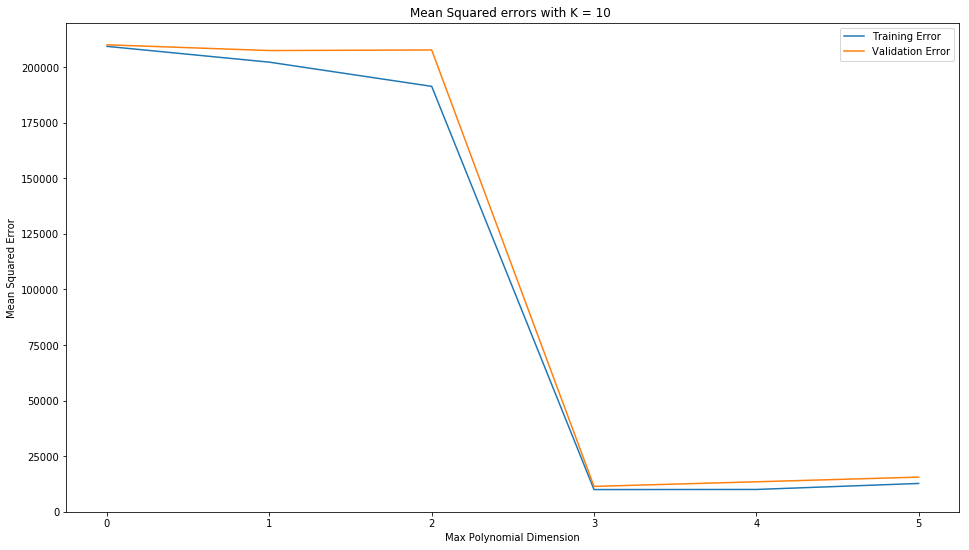

I find the optimal d to be: 3
Here is a plot of that fit:


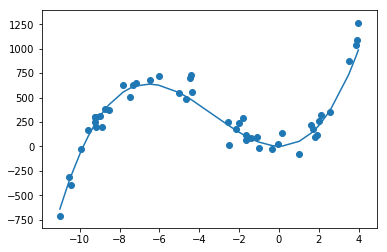

In [287]:

max_dim = 5
train = np.zeros((D,2))
val = np.zeros((D,2))
train, val = k_fold_OLS_dimensions(d_synth[:,0],d_synth[:,1],D=max_dim+1,K=10,lamb=500)
plt.figure(figsize=(16,9))
ds = np.arange(0,max_dim+1)
plt.plot(ds,train[:,0],label='Training Error')
plt.plot(ds,val[:,0],label='Validation Error')
plt.xlabel('Max Polynomial Dimension')
plt.ylabel('Mean Squared Error')
plt.title("Mean Squared errors with K = 10 ")
plt.legend()
plt.show()

optimal_d = np.argsort(val[:,0])[0]
print("I find the optimal d to be: {:}".format(optimal_d))
print("Here is a plot of that fit:")
x, w = OLS(d_synth[:,0],d_synth[:,1],lamb=500,d=optimal_d)
pred = np.dot(x,w)

plt.plot(x[:,1], pred)
plt.scatter(d_synth[:,0],d_synth[:,1])
plt.show()



Here the cross validation returned the polynomial order that is truly underlying the data and at high orders we see an increase in the validation error as well as it pulling away from the training error. I am confused about why the training error seems to be rising by d = 5 as the solver shoudl be able to set w5 = 0 in order to get at least as low a training error as d =4. This is perhaps due to the randomization of the folds with each pass. 

I'll also note that if I use a much smaller value for $\lambda$ then the validation error was sometimes minimized by a value of d > 3.

#### Synthdata  K=N

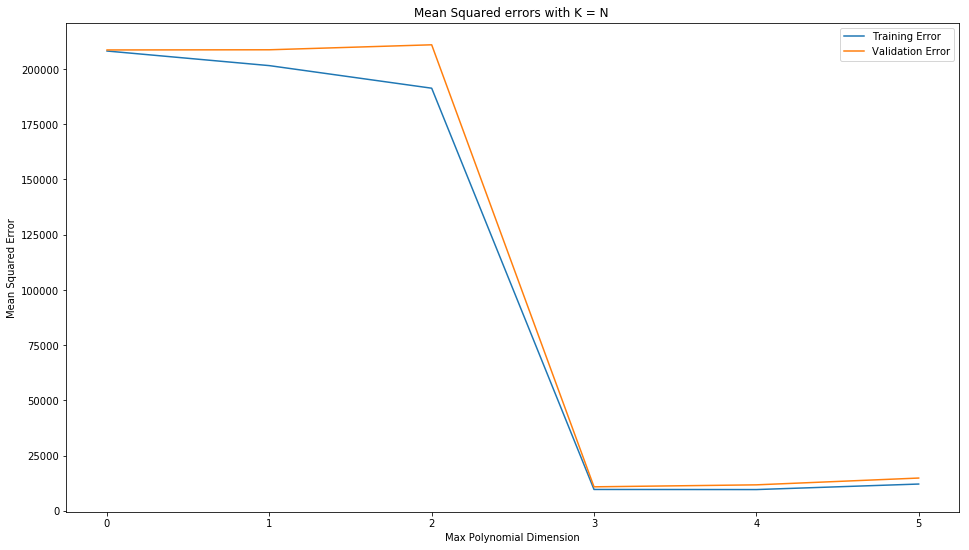

I find the optimal d to be: 3
Here is a plot of that fit:


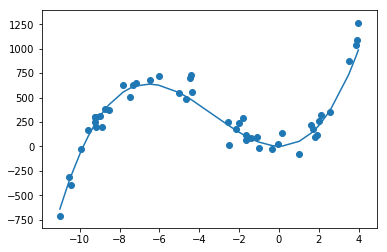

In [288]:

max_dim = 5
train = np.zeros((D,2))
val = np.zeros((D,2))
train, val = k_fold_OLS_dimensions(d_synth[:,0],d_synth[:,1],D=max_dim+1,K=d_synth.shape[0],lamb=500)
plt.figure(figsize=(16,9))
ds = np.arange(0,max_dim+1)
plt.plot(ds,train[:,0],label='Training Error')
plt.plot(ds,val[:,0],label='Validation Error')
plt.xlabel('Max Polynomial Dimension')
plt.ylabel('Mean Squared Error')
plt.title("Mean Squared errors with K = N ")
plt.legend()
plt.show()

optimal_d = np.argsort(val[:,0])[0]
print("I find the optimal d to be: {:}".format(optimal_d))
print("Here is a plot of that fit:")
x, w = OLS(d_synth[:,0],d_synth[:,1],lamb=500,d=optimal_d)
pred = np.dot(x,w)

plt.plot(x[:,1], pred)
plt.scatter(d_synth[:,0],d_synth[:,1])
plt.show()



## 4. d.

In [262]:
d_womens_100 = np.loadtxt('womens100.csv',delimiter=',')
years = np.array([2012, 2016])
actual = np.array([10.75, 10.71])
max_d = 5
sqr_errs = np.zeros(max_d)
print("d    |    Mean Sqr Err")
print("----------")
for d in range(0,max_d):
    w = OLS(d_womens_100[:,0],d_womens_100[:,1],lamb = 5, d=d)[1]
    x = polynomial_extend(years, d)
    pred = np.dot(x,w)
    sqr_errs[d] = mean_squared_error(pred, actual)
    print("{:}    |    {:}".format(d,sqr_errs[d]))
print("\n\nThe best prediciton was done by d={:}".format(np.argmin(sqr_errs)))




d    |    Mean Sqr Err
----------
0    |    3.4090390625000047
1    |    0.5357774497995968
2    |    0.030230224665053637
3    |    41897.30958319259
4    |    2303192.089582606


The best prediciton was done by d=2


C:\Users\ianhi\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in power


#### Comments on above
It seems that cross validation, which predicting d = 4 as the best, did not serve us terribly well in this case. If however we look at the plots we likely should choose the smallest d after which an increase will not result in an appreciable decrease in validation error. If we do that I would choose d = 2 which is optimal for this new measure. 

## 4. e.

Isn't this prone to overfitting because in a way we are using the cross validation set to determine two paramters? It seems that we should slice the training set into three sections. Though I can't see an easy way to do that with a grid search.


I started this but didn't finsih. I need to print out the min of the print statements in the double for loop to find the optimal

In [315]:
# choose the lambdas and dims to search over
lambdas = np.arange(0,30,6)
dims = np.arange(0,10,2)
print(dims.shape[0])
print(lambdas.shape[0])
res = np.zeros((lambdas.shape[0]*dims.shape[0],3))
res[4][2]=4
count =0
# print(res)
for l, lam in enumerate(lambdas):
    for d, dim in enumerate(dims):
        res[count][0] = lam
        res[count][1] = dim
        res[count][2] = K_fold_OLS(d_womens_100[:,0],d_womens_100[:,1],lamb = lam, d=d)[3]
        print(K_fold_OLS(d_womens_100[:,0],d_womens_100[:,1],lamb = lam, d=d)[3])
        count += 1
print(res)

print(np.argmin(res[:,2]))
minnn = np.argmin(res[:,2])
print("So optimal is lambda = {:} and D = {:}".format(res[minnn][0],res[minnn][1]))
        


5
5
0.291571698645
0.0619123254388
0.039566980404
0.0579366385404
3344.07320995
2.4865398997
0.237568658814
0.0489171974819
0.0518558513983
0.0457354709115
3.7627749853
0.355173058396
0.073590921669
0.0591681805898
0.0418752345092
4.37649635462
0.252309328215
0.054582036596
0.0480586181415
0.0397300538423
4.14169548892
0.225396384194
0.0504223891757
0.0542130077388
0.0478005221277
[[  0.00000000e+00   0.00000000e+00   1.51161989e-01]
 [  0.00000000e+00   2.00000000e+00   4.68094553e-02]
 [  0.00000000e+00   4.00000000e+00   3.56207494e-02]
 [  0.00000000e+00   6.00000000e+00   5.00338575e-02]
 [  0.00000000e+00   8.00000000e+00   3.80407548e+02]
 [  6.00000000e+00   0.00000000e+00   2.52533609e+00]
 [  6.00000000e+00   2.00000000e+00   2.54460902e-01]
 [  6.00000000e+00   4.00000000e+00   7.37443629e-02]
 [  6.00000000e+00   6.00000000e+00   4.46085233e-02]
 [  6.00000000e+00   8.00000000e+00   3.91028516e-02]
 [  1.20000000e+01   0.00000000e+00   2.77432012e+00]
 [  1.20000000e+01   2

# Problem 5:

Lets start off with our loss function:
$$ L = (t-Xw)^TA(t-Xw) $$
Distributing the transpose and expanding
$$ L = (t^T-(Xw)^T)A(t-Xw) = (t^TA-(Xw)^TA)(t-Xw)= t^TAt -t^TAXw -(Xw)^TAt + (Xw)^TAXw $$

$$ = t^TAt -(X^TA^Tt)^Tw -w^TX^TAt + w^TX^TAXw $$

Recalling that A is diagonal we can write  $A^T = A$ and then take the derivative w.r.t. w and set that equal to zero.

$$ \frac{\partial L}{\partial w} = 0 -X^TAt - X^TAt + 2X^TAX\hat{w} \equiv 0 $$

Now solve for w

$$ 2X^TAXw = 2X^TAt $$

$$ \hat{w} = (X^TAX)^{-1} X^TAt $$

In the case of equal weighting $A = I$ this solution reduces to the OLS without weighting as expected so I suspect this is the correct derivation.